In [2]:
import pandas as pd
course_name = ['Data Science', 'Machine Learning', 'Big Data', 'Data Engineer']
duration = [2,3,6,4]
df = pd.DataFrame(data = {'course_name' : course_name, 'duration' : duration})
df

,course_name,duration
0,Data Science,2
1,Machine Learning,3
2,Big Data,6
3,Data Engineer,4


In [3]:
#Ans 1
df.iloc[1]

course_name    Machine Learning
duration                      3
Name: 1, dtype: object

Ans 2

loc is primarily label-based and allows indexing and slicing using explicit labels of rows and columns. It accepts row and column labels or Boolean arrays, and the indexing is inclusive of both the start and end values.

iloc is primarily integer-based and allows indexing and slicing using integer positions of rows and columns. It accepts integer-based indexing, and the indexing is exclusive of the end value.

In [4]:
#Ans 3
new_df = df.reindex([3,0,1,2])
new_df

,course_name,duration
3,Data Engineer,4
0,Data Science,2
1,Machine Learning,3
2,Big Data,6


In [5]:
new_df.iloc[2]

course_name    Machine Learning
duration                      3
Name: 1, dtype: object

In [6]:
new_df.loc[2]

course_name    Big Data
duration              6
Name: 2, dtype: object

The difference in above output is because .loc locates the given value whereas .iloc locates the given index and return the respective values

In [7]:
import numpy as np
columns = ['column_1', 'column_2', 'column_3', 'column_4', 'column_5', 'column_6']
indices = [1,2,3,4,5,6]
#Creating a dataframe:
df1 = pd.DataFrame(np.random.rand(6,6), columns = columns, index = indices)
df1

,column_1,column_2,column_3,column_4,column_5,column_6
1,0.250016,0.427601,0.943086,0.823308,0.919097,0.628274
2,0.873230,0.110384,0.955094,0.849657,0.897117,0.381098
3,0.111577,0.597007,0.268462,0.262710,0.269777,0.816044
4,0.441473,0.052102,0.198716,0.522576,0.457105,0.526983
5,0.356511,0.036585,0.111424,0.140409,0.725210,0.167263
6,0.536803,0.683466,0.320268,0.908339,0.390633,0.519614


In [8]:
#Ans 4(i)
for column in df1.columns:
    print(f'{column} mean:',df1.mean()[f'{column}'])

column_1 mean: 0.4282683307459108
column_2 mean: 0.3178574699996182
column_3 mean: 0.4661748853264512
column_4 mean: 0.5844995859975766
column_5 mean: 0.6098233575383626
column_6 mean: 0.5065461242098005


In [9]:
#Ans 4(ii)
df1.std()['column_2']

0.2885908584880121

In [15]:
#Ans 5

df1.loc[2,'column_2'] = 'Test string'

,column_1,column_2,column_3,column_4,column_5,column_6
1,0.250016,0.427601,0.943086,0.823308,0.919097,0.628274
2,0.873230,Test string,0.955094,0.849657,0.897117,0.381098
3,0.111577,0.597007,0.268462,0.262710,0.269777,0.816044
4,0.441473,0.052102,0.198716,0.522576,0.457105,0.526983
5,0.356511,0.036585,0.111424,0.140409,0.725210,0.167263
6,0.536803,0.683466,0.320268,0.908339,0.390633,0.519614


In [18]:
df1.mean()['column_2']

#will give error bcoz there is a string present in column 2 and hence mean cannot be calculated

/tmp/ipykernel_70/4233452750.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.mean()['column_2']


KeyError: 'column_2'

Ans 6

In pandas, the window functions provide a way to perform calculations on a set of data points called a "window" that moves across a series or a DataFrame. These functions are particularly useful for performing rolling or expanding calculations.

There are several types of window functions available in pandas:

1. Rolling Window Functions: These functions operate on a fixed-size window and perform calculations on the values within that window as it moves along the data. Examples include rolling.mean(), rolling.sum(), `rolling.min()`, rolling.max(), and `rolling.std()`. These functions are useful for calculating moving averages, cumulative sums, or other rolling calculations.

2. Expanding Window Functions: These functions perform calculations on all the data points up to the current position. The window size starts from a minimum size and expands as it includes more data points. Examples include `expanding.sum()`, `expanding.mean()`, and `expanding.min()`. These functions are useful for calculating cumulative sums, averages, or other expanding calculations.

3. Exponential Weighted Window Functions: These functions assign weights to data points within the window, where the weights decrease exponentially as the data points get older. Examples include `ewm.mean()`, `ewm.var()`, and `ewm.std()`. These functions are useful for calculating exponentially weighted moving averages or other exponentially weighted calculations.

4. Rolling Apply Functions: These functions allow applying custom functions to the rolling window. The `rolling.apply()` function takes a custom function as an argument and applies it to the data points within the window.

These window functions provide powerful tools for analyzing time series data and performing various calculations based on moving or expanding windows.

In [24]:
#ans 7
import time

current_date = time.localtime()
df2 = pd.DataFrame({'Month': [current_date.tm_mon], 'Year': [current_date.tm_year]})
df2

,Month,Year
0,7,2023


In [29]:
#Ans 8

date1 = pd.to_datetime(input('Enter end date: '))
date2 = pd.to_datetime(input('Enter start date: '))
if date1<date2:
    print('Invalid')
dif = pd.Timedelta(date1-date2)
print(dif)

Enter end date:  2023-01-31
Enter start date:  2023-01-01


30 days 00:00:00


In [15]:
#Ans 9

file_path = input("Enter the CSV file path: ")
df = pd.read_csv(file_path)
print(df.columns)

column_name = input("Enter the column name to convert to categorical: ")
print(df[f'{column_name}'].unique())

category_order = input("Enter the category order (comma-separated values): ").split(",")

df[column_name] = pd.Categorical(df[column_name], categories=category_order, ordered=True)

sorted_df = df.sort_values(column_name)

print(sorted_df)

Enter the CSV file path:  players.csv


Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


Enter the column name to convert to categorical:  Pos


['PF' 'SG' 'C' 'SF' 'Pos' 'PG' 'SG-PG' 'PG-SG' 'SF-PF' 'SF-SG' 'SG-SF'
 'PF-SF']


Enter the category order (comma-separated values):  PF,C,SF


      Rk          Player  Pos Age   Tm   G  GS    MP   FG   FGA  ...   FT%  \
0      1      Quincy Acy   PF  24  NYK  68  22  1287  152   331  ...  .784   
217  166  Kevin Garnett*   PF  38  BRK  42  42   854  125   275  ...  .829   
218  166  Kevin Garnett*   PF  38  MIN   5   5    98   18    31  ...  .500   
220  168       Pau Gasol   PF  34  CHI  78  78  2681  570  1153  ...  .803   
453  350    Kyle O'Quinn   PF  24  ORL  51  17   824  119   242  ...  .772   
..   ...             ...  ...  ..  ...  ..  ..   ...  ...   ...  ...   ...   
660  484    Nate Wolters  NaN  23  MIL  11   0   142   12    31  ...  .250   
661  484    Nate Wolters  NaN  23  NOP  10   0   105    8    26  ...  .500   
667  487     Tony Wroten  NaN  21  PHI  30  15   895  175   434  ...  .667   
668  488     James Young  NaN  19  BOS  31   0   332   36   102  ...  .552   
669  489      Nick Young  NaN  29  LAL  42   0  1000  174   476  ...  .892   

     ORB  DRB  TRB  AST STL  BLK  TOV   PF   PTS  
0     79  22

Enter file name: sales.csv


Text(0, 0.5, 'Sales')

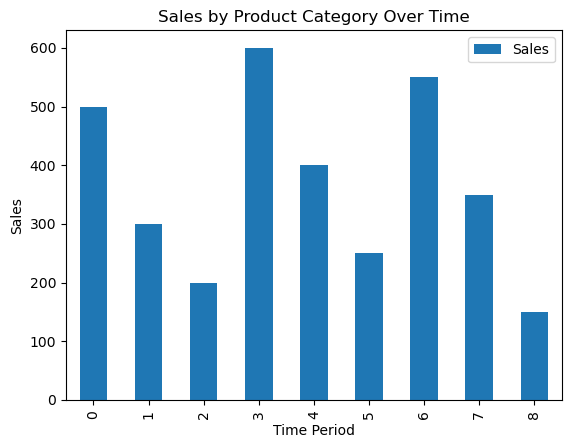

In [21]:
#Ans 10
import pandas as pd

file  = input('Enter file name:')

df = pd.DataFrame(pd.read_csv(file))

df.set_index('Time_Period', inplace=True)

df.plot(kind = 'bar', stacked = True)
plt.title('Sales by Product Category Over Time')
plt.xlabel('Time Period')
plt.ylabel('Sales')

In [4]:
#Ans 11

file = pd.read_csv(input('Enter file path:'))
data = pd.DataFrame(file)

Enter file path: student_data.csv


,Student ID,Test Score
0,1,85
1,2,90
2,3,80
3,4,75
4,5,85
5,6,82
6,7,78
7,8,85
8,9,90
9,10,85


In [13]:
stats = pd.DataFrame({'stats':[data.mean()['Test Score'], 
                               data.median()['Test Score'], 
                               data.mode()['Test Score'][0]]},
                     index = ['mean','median','mode'])
stats

,stats
mean,83.5
median,85.0
mode,85.0
